## Load the data

First of all, let's load the dataset into a dataframe with the **pandas** package.

In [2]:
# Set warnings to "ignore" to keep the notebook clean
import warnings
warnings.filterwarnings("ignore")

In [3]:
# Import the packages
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
import nltk
import jinja2
from nltk.tokenize import word_tokenize
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\datat\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\datat\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [4]:
# Create the filepath for csv file
import os
parent_folder = os.path.dirname(os.path.abspath(os.getcwd()))
file=os.path.join(parent_folder, '2. Raw Data/Japanese_to_English.csv')

In [5]:
# Read the csv file
df=pd.read_csv(file)

## Data Preprocessing

### Initial data exploration

Once the data is loaded and saved into a dataframe, we perform the initial data exploration such as displaying the first few rows, checking the missing values with the summary.

In [5]:
# display first 5 rows
df.head()

,original,corrected
0,听力,Uncorrected
1,我最近为提高汉语的听力，听NHK的汉语广播讲座。,Uncorrected
2,这是有意思的讲座，但是对话有点短。,Uncorrected
3,我想听更长的对话。,Uncorrected
4,有没有什么好广播还是电视节目？,Uncorrected


In [123]:
# display the last 5 rows with wider column width
# credit: https://stackoverflow.com/questions/39680147/can-i-set-variable-column-widths-in-pandas
# df.tail().style.set_properties(subset=['original','corrected'], **{'width': '400px'})

In [6]:
# display the column summary.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2408334 entries, 0 to 2408333
Data columns (total 2 columns):
 #   Column     Dtype 
---  ------     ----- 
 0   original   object
 1   corrected  object
dtypes: object(2)
memory usage: 36.7+ MB


In [7]:
# display the missing values in columns
df.isna().sum()

original     49
corrected     1
dtype: int64

In [8]:
# drop the rows with missing values
df.dropna(subset=['original'],inplace=True)

In [9]:
# check the missing values again
df.isna().sum()

original     0
corrected    1
dtype: int64

In [10]:
# display the number of sentences labelled as 'uncorrected'
df[df['corrected']=='Uncorrected'].count()

original     1397112
corrected    1397112
dtype: int64

In [11]:
# display the number of sentences labelled as 'uncorrected'
df[df['corrected']!='Uncorrected'].count()

original     1011173
corrected    1011172
dtype: int64

In [12]:
# filter out the 'uncorrected' sentences and save into new dataframe 'df_cor'
df_cor=df[df['corrected']!='Uncorrected'].reset_index(drop=True)

In [13]:
# remove the rows where are not strings if any
df_cor= df_cor[df_cor[["original", "corrected"]].applymap(lambda x: isinstance(x, str)).all(axis=1)]

In [14]:
# display the shape of dataframe
df_cor.shape

(1011172, 2)

In [15]:
# remove the non-English characters
import re
df_cor["original"] = df_cor["original"].apply(lambda x: re.sub(r"[^a-zA-Z0-9\s.,!?'\-\(\)\[\]…]+", "", x) if isinstance(x, str) else x)
df_cor["corrected"] = df_cor["corrected"].apply(lambda x: re.sub(r"[^a-zA-Z0-9\s.,!?'\-\(\)\[\]…]+", "", x) if isinstance(x, str) else x)

In [16]:
# display the first 30 rows
df_cor.head(30) #.style.set_properties(subset=['original','corrected'], **{'width': '400px'})

,original,corrected
0,I will appreciate it if you correct my sentences.,I would appreciate it if you could correct my ...
1,It's been getting colder these days here in Ja...,It's been getting colder lately here in Japan....
2,The summer weather in Japan is not agreeable t...,I find Japan's summer weather disagreeable bec...
3,"So, as the winter is coming, I'm getting to fe...","So, as the winter is coming, I'm starting to f..."
4,It is the very exciting season.,It is a very exciting season.
5,"But, before enjoying those kind of happy time,...","But, before enjoying those kind of happy times..."
6,I have a fiancee and she is finding her job.,I have a fiancee and she is finding a job.(if ...
7,It seems not easy to find a job for women in J...,It doesn't seem easy for women to find jobs in...
8,"The first, most women have baby and they have ...","The first, most women have babies and they hav..."
9,Employers don't like it even if maternity leav...,Employers don't like it even if maternity leav...


It can be seen that there are some additional comments or explanations in the column of `corrected` which are not part of the original sentence(s). These comments or explanation are put into a parenthesis sometimes such as the second row where the column of `corrected` includes explanation about the phrase 'These days'. We need to figure out a way to identify the sentences with additional explanation in the column of `corrected`.

## Word Count

Let's create two new columns to count the words in original and corrected sentences respectively.

In [17]:
# create new column named 'word_count' in the dataframe
df_cor['word_count_original']=df_cor['original'].apply(lambda x:len(x.split()))
df_cor['word_count_corrected']=df_cor['corrected'].apply(lambda x:len(x.split()))

In [18]:
# display the descriptive statistics
df_cor.describe()

,word_count_original,word_count_corrected
count,1.011172e+06,1.011172e+06
mean,1.104089e+01,1.342178e+01
std,6.407187e+00,1.101277e+01
min,0.000000e+00,0.000000e+00
25%,7.000000e+00,7.000000e+00
50%,1.000000e+01,1.100000e+01
75%,1.400000e+01,1.600000e+01
max,1.360000e+02,1.455000e+03


In [19]:
# filter the rows where there are more than 2 words. (word counts>3 as one punctuation is included)
df_cor=df_cor[(df_cor['word_count_original']>3)&(df_cor['word_count_corrected']>3)]

In [20]:
# display the first 30 rows
df_cor.head(30) #.style.set_properties(subset=['original','corrected'], **{'width': '400px'})

,original,corrected,word_count_original,word_count_corrected
0,I will appreciate it if you correct my sentences.,I would appreciate it if you could correct my ...,9,10
1,It's been getting colder these days here in Ja...,It's been getting colder lately here in Japan....,9,43
2,The summer weather in Japan is not agreeable t...,I find Japan's summer weather disagreeable bec...,16,13
3,"So, as the winter is coming, I'm getting to fe...","So, as the winter is coming, I'm starting to f...",11,11
4,It is the very exciting season.,It is a very exciting season.,6,6
5,"But, before enjoying those kind of happy time,...","But, before enjoying those kind of happy times...",16,16
6,I have a fiancee and she is finding her job.,I have a fiancee and she is finding a job.(if ...,10,28
7,It seems not easy to find a job for women in J...,It doesn't seem easy for women to find jobs in...,12,11
8,"The first, most women have baby and they have ...","The first, most women have babies and they hav...",13,13
9,Employers don't like it even if maternity leav...,Employers don't like it even if maternity leav...,13,13


We can find that 
- when comments or explanation are not included in the `corrected` column, a corrected sentence could be slightly longer or shorter than its original sentence;
- when comments or explanation are included, the length of a corrected sentence will be much longer than its original sentence (over 2 times). 

Thus let's explore the corrected sentences with additional explanation using the filter below and estimate the total number of these records. 

In [21]:
# count the number of corrected sentences with additional explanation
df_cor[df_cor['word_count_corrected']/df_cor['word_count_original']>=2].count()

original                77352
corrected               77352
word_count_original     77352
word_count_corrected    77352
dtype: int64

In [22]:
# display the first 30 sentences with additional explanation
df_cor[df_cor['word_count_corrected']/df_cor['word_count_original']>=2].head(50) #.style.set_properties(subset=['original','corrected'], **{'width': '400px'})

,original,corrected,word_count_original,word_count_corrected
1,It's been getting colder these days here in Ja...,It's been getting colder lately here in Japan....,9,43
6,I have a fiancee and she is finding her job.,I have a fiancee and she is finding a job.(if ...,10,28
14,"When I was a child, I liked snowing.","When I was a child, I liked snow. Or...When I ...",8,18
29,This is drinking session.,This is drinking session. (Not quite sure what...,4,12
36,Toshi-Densetsu means city regend.,Toshi-Densetsu means city legend. ['Urban lege...,4,9
48,"There is a variety of curry menu green,yellow,...","There is a variety of curry menus like green,y...",10,28
57,at the beach because I can forget various stre...,because I can forget various stressful things ...,11,24
78,Does the sentence I wrote above make sense?,Does the sentence I wrote above make sense? ye...,8,16
102,I went to San Francisco with who got to know w...,I went to San Francisco with who got to know w...,17,36
103,We went to eat the lunch in Itarian and chated...,We went to eat the lunch in Itarian and chated...,14,29


Findings from the rows above:
- The additional explanation is normally in parenthesis () or square bracket []
- A corrected sentense is normally the first sentence in the `corrected` column. The sentence can be ended with '.', '!', '?', '!!', '...','......' followed by () or []. 
- Sometimes the first sentence in the the `corrected` column could be the repeat of original sentence. In this case, the row should be removed since the first sentence is not the corrected one.

In [23]:
df_cor.count()

original                952442
corrected               952442
word_count_original     952442
word_count_corrected    952442
dtype: int64

In [25]:
# define function to extract the first sentence
import re
def extract_first_sentence(text):
    # use regular expression to find first sentence ending with dot (.) or question mark(?) or exclamation mark (!) 
    # or ellipsis points (...) or (......)
    first_sentence_match = re.search(r'^.*?(?:[\.\?!]|(?:\.{3,6}))', text)
    if first_sentence_match is not None:
        first_sentence = first_sentence_match.group(0)
    else:
        # first_sentence = ""
        first_sentence = text.split('\n')[0]
    return first_sentence

In [26]:
# create the new column `corrected_fs`` by extracting the first sentence from the column `corrected`
df_cor['corrected_fs']=df_cor['corrected'].apply(lambda x:extract_first_sentence(x))

In [27]:
df_par=df_cor.copy()

In [28]:
pattern = r'(\(.*?\)|\[.*?\])'
# Define a custom function to return None if no matches are found
def find_pattern_or_none(x):
    matches = re.findall(pattern, x)
    return None if not matches else matches[0]
df_par['original_par']=df_par['original'].apply(lambda x: find_pattern_or_none(x))
df_par['corrected_par']=df_par['corrected'].apply(lambda x: find_pattern_or_none(x))

In [40]:
import numpy as np
# Remove parenthesis and brackets and create a new dataframe

# create two empty lists
original = []
corrected = []

pattern = r'(\(.*?\)|\[.*?\])' #for any text within brackets or parenthesis
whitespaces = re.compile(r'\s') #any white spaces (checks for spaces in the text, indicating more than one word)
parenthesis = re.compile(r'[()\[\]{}]') #for any parenthesis, brackets only. No text

# loop through rows, append data to new list if meets conditions
# A pass represents a deletion of the row (not added to the list)
for index, row in df_par.iterrows():
    
    # Case 1: original and corrected both have words inside parenthesis
    if row['original_par'] is not None and row['corrected_par'] is not None:
        
        # Case 1a: original and corrected have same words inside parenthesis
        if row['original_par'] == row['corrected_par']:
            original.append(re.sub(pattern, '', row['original']))
            corrected.append(re.sub(pattern, '', row['corrected']))
        
        # Case 2a: parenthesis in the original and corrected are different, remove row
        else:
            pass
    
    # Case 2: only corrected has words inside parenthesis
    elif row['original_par'] is None and row['corrected_par'] is not None:

        # Case 2a: if spaces exist, indicates more than one word, remove row
        if whitespaces.search(row['corrected_par']):
            pass

        # Case 2b: one word only, remove parenthesis
        else:
            original.append(row['original'])
            corrected.append(re.sub(parenthesis, '', row['corrected']))

    # Case 3: no parenthesis are found
    elif row['original_par'] is None and row['corrected_par'] is None:
        original.append(row['original'])
        corrected.append(row['corrected'])

    # Case 4: parenthesis with words exists in Original but not corrected, #pass
    elif row['original_par'] is not None and row['corrected_par'] is None:
        original.append(re.sub(pattern, '', row['original']))
        corrected.append(row['corrected'])
    
    else:
        pass

df_par_clean = pd.DataFrame(columns=['original','corrected'])
df_par_clean['original'] = original
df_par_clean['corrected'] = corrected

In [42]:
df_par_clean.head(50)

,original,corrected
0,I will appreciate it if you correct my sentences.,I would appreciate it if you could correct my ...
1,The summer weather in Japan is not agreeable t...,I find Japan's summer weather disagreeable bec...
2,"So, as the winter is coming, I'm getting to fe...","So, as the winter is coming, I'm starting to f..."
3,It is the very exciting season.,It is a very exciting season.
4,"But, before enjoying those kind of happy time,...","But, before enjoying those kind of happy times..."
5,I have a fiancee and she is finding her job.,I have a fiancee and she is finding a job.(if ...
6,It seems not easy to find a job for women in J...,It doesn't seem easy for women to find jobs in...
7,"The first, most women have baby and they have ...","The first, most women have babies and they hav..."
8,Employers don't like it even if maternity leav...,Employers don't like it even if maternity leav...
9,"The second, women workers likely to quit thei...","The second, women workers likely to quit thei..."


In [43]:
df_par_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 868562 entries, 0 to 868561
Data columns (total 2 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   original   868562 non-null  object
 1   corrected  868562 non-null  object
dtypes: object(2)
memory usage: 13.3+ MB


In [44]:
# Export Data that has parenthesis removed for further cleaning

df_par_clean.to_csv("../3. Cleaned Data/JPtoEN_no_par.csv")

In [36]:
df_par.head(20).style.set_properties(subset=['original','corrected'], **{'width': '400px'})

,original,corrected,word_count_original,word_count_corrected,corrected_fs,original_par,corrected_par
0,I will appreciate it if you correct my sentences.,I would appreciate it if you could correct my sentences.,9,10,I would appreciate it if you could correct my sentences.,None,None
1,It's been getting colder these days here in Japan.,"It's been getting colder lately here in Japan. (These days is a phrase I often hear Japanese and Korean native speakers use in their English, although in native English speakers would probably say lately or recently. It's sort of the equivalent of .)",9,43,It's been getting colder lately here in Japan.,None,"(These days is a phrase I often hear Japanese and Korean native speakers use in their English, although in native English speakers would probably say lately or recently. It's sort of the equivalent of .)"
2,The summer weather in Japan is not agreeable to me with its high humidity and temperature.,I find Japan's summer weather disagreeable because of its high humidity and temperature.,16,13,I find Japan's summer weather disagreeable because of its high humidity and temperature.,None,None
3,"So, as the winter is coming, I'm getting to feel better.","So, as the winter is coming, I'm starting to feel better.",11,11,"So, as the winter is coming, I'm starting to feel better.",None,None
4,It is the very exciting season.,It is a very exciting season.,6,6,It is a very exciting season.,None,None
5,"But, before enjoying those kind of happy time, I have to do a kind of boring,","But, before enjoying those kind of happy times, I have to do a kind of boring,",16,16,"But, before enjoying those kind of happy times, I have to do a kind of boring,",None,None
6,I have a fiancee and she is finding her job.,"I have a fiancee and she is finding a job.(if she doesn't have a job yet use a job, butif she has a job then use her job",10,28,I have a fiancee and she is finding a job.,None,None
7,It seems not easy to find a job for women in Japan.,It doesn't seem easy for women to find jobs in Japan.,12,11,It doesn't seem easy for women to find jobs in Japan.,None,None
8,"The first, most women have baby and they have to take maternity leave.","The first, most women have babies and they have to take maternity leave.",13,13,"The first, most women have babies and they have to take maternity leave.",None,None
9,Employers don't like it even if maternity leave is the right for employees.,Employers don't like it even if maternity leave is the right of employees.,13,13,Employers don't like it even if maternity leave is the right of employees.,None,None


In [ ]:
# Define a function to clean parentheses
def clean_parentheses(data:pd.DataFrame,a:str,b:str):
 re.findall(pattern, sentence)

In [144]:
# Define a function to remove parentheses and content within them if word count>3
def remove_parentheses(text):
    pattern = r"\(\s*\b\w+(?:\W+\w+){3,}?\b\s*\)"  # Define a new pattern to match text with 3 or more words within parentheses
    result = re.sub(pattern, '', text)  # Remove parentheses and content within them
    result = result.strip()  # Remove leading/trailing spaces
    return result 
# if len(result.split()) > 0 else None

In [145]:
# create the new column `corrected_fs`` by extracting the first sentence from the column `corrected`
df_cor['corrected_fs']=df_cor['corrected_fs'].apply(lambda x: remove_parentheses(x))

In [146]:
# Define a function to remove square bracket and content within them if word count>3
def remove_squarebracket(text):
    pattern = r"\[\s*\b\w+(?:\W+\w+){3,}?\b\s*\]"  # Define a new pattern to match text with 3 or more words within parentheses
    result = re.sub(pattern, '', text)  # Remove parentheses and content within them
    result = result.strip()  # Remove leading/trailing spaces
    return result 

In [147]:
# create the new column `corrected_fs`` by extracting the first sentence from the column `corrected`
df_cor['corrected_fs']=df_cor['corrected_fs'].apply(lambda x: remove_squarebracket(x))

In [148]:
# display the first 50 rows
df_cor.head(50) #.style.set_properties(subset=['original','corrected'], **{'width': '400px'})

,original,corrected,word_count_original,word_count_corrected,corrected_fs
0,I will appreciate it if you correct my sentences.,I would appreciate it if you could correct my ...,9,10,I would appreciate it if you could correct my ...
1,It's been getting colder these days here in Ja...,It's been getting colder lately here in Japan....,9,43,It's been getting colder lately here in Japan.
2,The summer weather in Japan is not agreeable t...,I find Japan's summer weather disagreeable bec...,16,13,I find Japan's summer weather disagreeable bec...
3,"So, as the winter is coming, I'm getting to fe...","So, as the winter is coming, I'm starting to f...",11,11,"So, as the winter is coming, I'm starting to f..."
4,It is the very exciting season.,It is a very exciting season.,6,6,It is a very exciting season.
5,"But, before enjoying those kind of happy time,...","But, before enjoying those kind of happy times...",16,16,"But, before enjoying those kind of happy times..."
6,I have a fiancee and she is finding her job.,I have a fiancee and she is finding a job.(if ...,10,28,I have a fiancee and she is finding a job.
7,It seems not easy to find a job for women in J...,It doesn't seem easy for women to find jobs in...,12,11,It doesn't seem easy for women to find jobs in...
8,"The first, most women have baby and they have ...","The first, most women have babies and they hav...",13,13,"The first, most women have babies and they hav..."
9,Employers don't like it even if maternity leav...,Employers don't like it even if maternity leav...,13,13,Employers don't like it even if maternity leav...


In [149]:
df_cor[df_cor['original']==df_cor['corrected_fs']].head(30) #.style.set_properties(subset=['original','corrected'], **{'width': '400px'})

,original,corrected,word_count_original,word_count_corrected,corrected_fs
29,This is drinking session.,This is drinking session. (Not quite sure what...,4,12,This is drinking session.
30,Drinking lure me to smoke.,Drinking lure me to smoke.,5,5,Drinking lure me to smoke.
78,Does the sentence I wrote above make sense?,Does the sentence I wrote above make sense? ye...,8,16,Does the sentence I wrote above make sense?
102,I went to San Francisco with who got to know w...,I went to San Francisco with who got to know w...,17,36,I went to San Francisco with who got to know w...
103,We went to eat the lunch in Itarian and chated...,We went to eat the lunch in Itarian and chated...,14,29,We went to eat the lunch in Itarian and chated...
104,"And, I thought that a waiter was cool and very...","And, I thought that a waiter was cool and very...",11,23,"And, I thought that a waiter was cool and very..."
106,After that we did shopping!,After that we did shopping! some shopping!,5,7,After that we did shopping!
107,"And, today I went to Piedmont Avenue.","And, today I went to Piedmont Avenue. As for t...",7,12,"And, today I went to Piedmont Avenue."
109,"I bought a pierce, and I think that it is very...","I bought a pierce, and I think that it is very...",12,28,"I bought a pierce, and I think that it is very..."
110,I spent a happy weekend!,I spent a happy weekend! I had a wonderful wee...,5,10,I spent a happy weekend!


In [150]:
# exclude the rows where original sentence is same as the corrected first sentence and reset the index
df_cor_fs=df_cor[df_cor['original']!=df_cor['corrected_fs']].reset_index(drop=True)

In [151]:
# drop the columns 'corrected' and 'word_count_corrected'
df_cor_fs.drop(columns=['corrected','word_count_corrected'],inplace=True)

In [152]:
# create new columns for word count of corrected first sentence 'word_count_corrected_fs'
df_cor_fs['word_count_corrected_fs']=df_cor_fs['corrected_fs'].apply(lambda x:len(x.split()))

In [153]:
# display the summary of dataframe df_cor_fs
df_cor_fs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 921663 entries, 0 to 921662
Data columns (total 4 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   original                 921663 non-null  object
 1   word_count_original      921663 non-null  int64 
 2   corrected_fs             921663 non-null  object
 3   word_count_corrected_fs  921663 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 28.1+ MB


In [154]:
# display the first 5 rows
df_cor_fs.head(30) #.style.set_properties(subset=['original','corrected_fs'], **{'width': '200px'})

,original,word_count_original,corrected_fs,word_count_corrected_fs
0,I will appreciate it if you correct my sentences.,9,I would appreciate it if you could correct my ...,10
1,It's been getting colder these days here in Ja...,9,It's been getting colder lately here in Japan.,8
2,The summer weather in Japan is not agreeable t...,16,I find Japan's summer weather disagreeable bec...,13
3,"So, as the winter is coming, I'm getting to fe...",11,"So, as the winter is coming, I'm starting to f...",11
4,It is the very exciting season.,6,It is a very exciting season.,6
5,"But, before enjoying those kind of happy time,...",16,"But, before enjoying those kind of happy times...",16
6,I have a fiancee and she is finding her job.,10,I have a fiancee and she is finding a job.,10
7,It seems not easy to find a job for women in J...,12,It doesn't seem easy for women to find jobs in...,11
8,"The first, most women have baby and they have ...",13,"The first, most women have babies and they hav...",13
9,Employers don't like it even if maternity leav...,13,Employers don't like it even if maternity leav...,13


### Total Word Counts

In [155]:
# create a copy of df_cor_fs named as 'df_cor_eda'
df_cor_eda=df_cor_fs.copy()

In [156]:
# create the new columns 'word_count_diff' to calculate the number of word count difference between corrected and original sentences
df_cor_eda['word_count_diff']=df_cor_eda['word_count_corrected_fs']-df_cor_eda['word_count_original']

In [157]:
# create the new columns 'word_count_ratio' to calculate the ratio of word count between corrected and original sentences
df_cor_eda['word_count_ratio']=df_cor_eda['word_count_corrected_fs']/df_cor_eda['word_count_original']

In [158]:
# display the descriptive statistics
df_cor_eda.describe()

,word_count_original,word_count_corrected_fs,word_count_diff,word_count_ratio
count,921663.000000,921663.000000,921663.000000,921663.000000
mean,11.599218,11.711134,0.111916,1.043378
std,6.237244,6.053183,3.142707,0.274919
min,4.000000,0.000000,-128.000000,0.000000
25%,7.000000,7.000000,-1.000000,0.958333
50%,10.000000,10.000000,0.000000,1.000000
75%,14.000000,15.000000,1.000000,1.125000
max,136.000000,126.000000,71.000000,18.750000


In [159]:
# display the last 30 rows where word count ratio is higher than 1.25 and lower than 1.5
df_cor_eda[(df_cor_eda['word_count_ratio']>1.25)&(df_cor_eda['word_count_ratio']<1.5)].tail(30) #.style.set_properties(subset=['original'], **{'width': '400px'})

,original,word_count_original,corrected_fs,word_count_corrected_fs,word_count_diff,word_count_ratio
921140,In advancing IT technology and prevailing inte...,17,With the advancement of IT technology informat...,24,7,1.411765
921144,People in highest position like King and queen...,13,People ranking the highest positions like King...,18,5,1.384615
921161,"But like at first grade, maybe I don't have a ...",18,But like at first grade (--not sure what you m...,24,6,1.333333
921166,Sorry taking your time to answer my question a...,15,Thank you for taking the time to answer my que...,19,4,1.266667
921194,I wanna improve speaking ability and enjoy tal...,12,I want to improve my speaking ability and enjo...,16,4,1.333333
921239,"I engaged with children, I could communicate w...",10,"I was engaged with the children, and I could c...",13,3,1.300000
921240,"I engaged with children, I could communicate w...",10,"I was engaged with the children, and I could c...",13,3,1.300000
921250,"I am glad,I get a foreign country.",7,I am glad I got it from a foreign country.,10,3,1.428571
921304,I think that seeing movies in the theater is a...,15,I think that there is a big difference between...,19,4,1.266667
921330,I will have a lot of things because I am a col...,13,I have a lot of things to doon my hands (if yo...,18,5,1.384615


In [160]:
# display the last 30 rows where word count ratio is higher than 1.5
df_cor_eda[df_cor_eda['word_count_ratio']>1.5].tail(30) #.style.set_properties(subset=['original'], **{'width': '400px'})

,original,word_count_original,corrected_fs,word_count_corrected_fs,word_count_diff,word_count_ratio
920643,I wish make better cake than brother.,7,I wish (or 'would like') to make a better cake...,13,6,1.857143
920709,It's fine at present.,4,It's fine for the time being .,7,3,1.750000
920772,"I don't buy it at other times but I got it,",11,"I don't usually buy it, but got it today becau...",23,12,2.090909
920776,Stress of English writing and speaking,6,Stress of English writing and speaking The Str...,13,7,2.166667
920785,My writing is not writing but oral.,7,My writing is like talking instead of being ap...,11,4,1.571429
920811,Nice talking with you in my car.,7,I enjoyed chatting with you while we're riding...,11,4,1.571429
920864,Cars and ships were flown.,5,Cars and ships were flung thrown blown away ...,13,8,2.600000
920865,A lot of people were died due to being attacked.,10,A lot of people died due to being caught in th...,16,6,1.600000
920866,"At Wakabayashi coast, there are two handred dy...",9,"At Wakabayashi coast, there are two hundred de...",19,10,2.111111
920868,"I'm safe, but I can't hear of my uncle's famil...",14,"I'm safe, but I can't get news of but I have ...",32,18,2.285714


In [161]:
# display the last 30 rows where word count ratio is higher than 0.5 and lower than 0.75
df_cor_eda[(df_cor_eda['word_count_ratio']<0.75)&(df_cor_eda['word_count_ratio']>0.5)].tail(30) #.style.set_properties(subset=['original'], **{'width': '400px'})

,original,word_count_original,corrected_fs,word_count_corrected_fs,word_count_diff,word_count_ratio
920672,"and I graw in there, and now I live in Tokyo.",11,but now I live in Tokyo.,6,-5,0.545455
920677,I think myself who is the man that eats grass ...,16,I think of myself as the man that eats grass ...,11,-5,0.687500
920720,They are transitioning the price with accordin...,15,The price transitioning is considered by big o...,10,-5,0.666667
920722,However they are mainly used to make the basic...,20,which are mainly used for the basic material l...,13,-7,0.650000
920723,"While on the other hand, diamonds are used to ...",11,And diamonds are used to make jewelries.,7,-4,0.636364
920724,It is the point that it is mainly used to make...,15,"It is used for not essential needs,not basic n...",9,-6,0.600000
920731,I think that I don't use the word of Ninja art...,18,I think that I won't use the word Ninja art in...,13,-5,0.722222
920741,"Yesterday, I went to eating the YAKINIKU(that ...",18,"Yesterday, I went to eati YAKINIKU to celebrat...",11,-7,0.611111
920745,What a convenience this time is.,6,What a convenience .,4,-2,0.666667
920781,I wrote like Please get a picture my situation...,28,I wrote like Please get a picture my situation...,18,-10,0.642857


In [162]:
# filter the rows where word count ratio is more than 0.75 and less than 1.5
df_cor_eda=df_cor_eda[(df_cor_eda['word_count_ratio']<1.5)&(df_cor_eda['word_count_ratio']>0.75)]

In [163]:
# display the shape of dataframe df_cor_eda
df_cor_eda.shape

(823026, 6)

<Axes: xlabel='word_count_diff', ylabel='Count'>

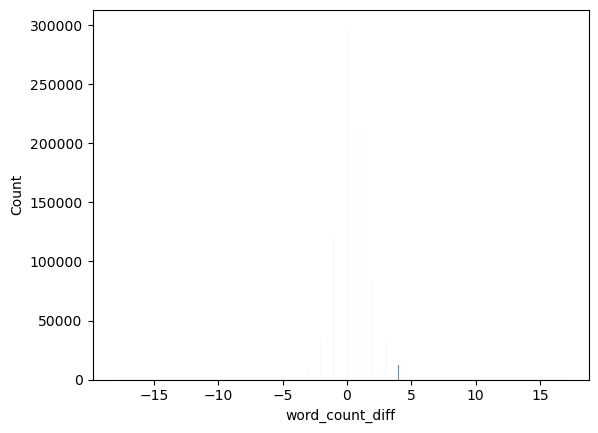

In [164]:
# visualise the histogram for word count difference (word_count_corrected_fs minus word_count_original)
sns.histplot(data=df_cor_eda,x='word_count_diff')

In [165]:
# display the top 10 rows with largest word count difference
df_cor_eda.sort_values(by=['word_count_diff'],ascending=False).head(10) #.style.set_properties(subset=['original'], **{'width': '400px'})

,original,word_count_original,corrected_fs,word_count_corrected_fs,word_count_diff,word_count_ratio
338524,Today is a national holiday in the UK called B...,40,Today is a national holiday in the UK called B...,57,17,1.425000
439839,"Here in Japan, we rarely see the sign No food ...",41,"Here in Japan, we rarely see the signs No food...",57,16,1.390244
774404,Japan has a proper rescue system for specific ...,33,Japan has a proper treatment system in place t...,49,16,1.484848
63479,propos du devoir plus important ou les mesure...,34,Concernant le sujet critique des contre-mesure...,49,15,1.441176
552078,Now I've firmly decided that I'll restart work...,33,Now I've firmly decided that I'll restart work...,48,15,1.454545
74275,"Colbert But we are not hearing, the reason it ...",32,"Colbert But we are not hearing, the reason I t...",46,14,1.437500
530172,There is undeniable sense that it's proverbial...,32,There is an undeniable sense of proverbiality ...,46,14,1.437500
165937,"My respectable person is Rosanne Haggerty, sin...",33,"The person I respect most is Rosanne Haggerty,...",47,14,1.424242
235331,"Sometimes, I was confused because of complicat...",31,"Sometimes, I was confused because of the compl...",45,14,1.451613
888798,"So act as to treat humanity, whether in your o...",29,A means to an end means something that you are...,43,14,1.482759


<Axes: xlabel='word_count_ratio', ylabel='Count'>

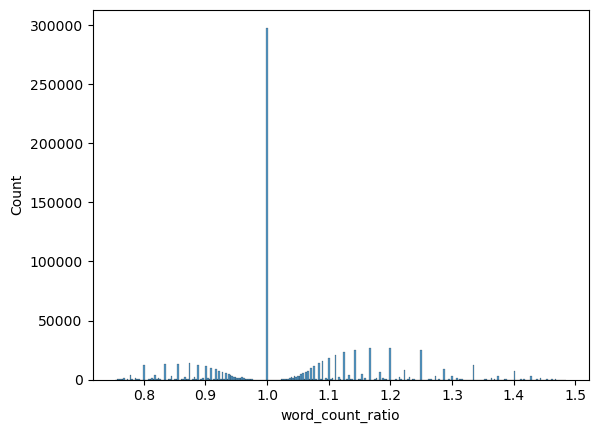

In [166]:
# visualise the histogram for word count ratio (word_count_corrected_fs:word_count_original)
sns.histplot(data=df_cor_eda,x='word_count_ratio')

In [167]:
# save csv file
file_path=os.path.join(parent_folder, '2. Raw Data/Japanese_to_English_cleaned.csv')
df_cor_eda.to_csv(file_path)

### Word Counts by POS Tags

In [168]:
# create the pos tags for original sentences and name the column 'o_pos_tags'
df_cor_eda['o_pos_tags']=df_cor_eda['original'].apply(lambda x: nltk.pos_tag(word_tokenize(x)))

In [169]:
# count the number of verb, noun, adjective, adverb, pronoun, preposition, conjection, article, modal in original sentences
df_cor_eda['o_num_verbs'] = df_cor_eda['o_pos_tags'].apply(lambda x: len([word for word, pos in x if pos.startswith('V')]))
df_cor_eda['o_num_nouns'] = df_cor_eda['o_pos_tags'].apply(lambda x: len([word for word, pos in x if pos.startswith('N')]))
df_cor_eda['o_num_adjs'] = df_cor_eda['o_pos_tags'].apply(lambda x: len([word for word, pos in x if pos.startswith('J')]))
df_cor_eda['o_num_adv'] = df_cor_eda['o_pos_tags'].apply(lambda x: len([word for word, pos in x if pos.startswith('RB')]))
df_cor_eda['o_num_pronoun'] = df_cor_eda['o_pos_tags'].apply(lambda x: len([word for word, pos in x if pos.startswith('PRP')]))
df_cor_eda['o_num_preposition'] = df_cor_eda['o_pos_tags'].apply(lambda x: len([word for word, pos in x if pos.startswith('IN')]))
df_cor_eda['o_num_conjunction'] = df_cor_eda['o_pos_tags'].apply(lambda x: len([word for word, pos in x if pos.startswith('CC')]))
df_cor_eda['o_num_article'] = df_cor_eda['o_pos_tags'].apply(lambda x: len([word for word, pos in x if pos.startswith('DT')]))
df_cor_eda['o_num_modal'] = df_cor_eda['o_pos_tags'].apply(lambda x: len([word for word, pos in x if pos.startswith('MD')]))

In [170]:
# create the pos tags for corrected sentences and name the column 'c_pos_tags'
df_cor_eda['c_pos_tags']=df_cor_eda['corrected_fs'].apply(lambda x: nltk.pos_tag(word_tokenize(x)))

In [171]:
# count the number of verb, noun, adjective, adverb, pronoun, preposition, conjection, article, modal in corrected sentences
df_cor_eda['c_num_verbs'] = df_cor_eda['c_pos_tags'].apply(lambda x: len([word for word, pos in x if pos.startswith('V')]))
df_cor_eda['c_num_nouns'] = df_cor_eda['c_pos_tags'].apply(lambda x: len([word for word, pos in x if pos.startswith('N')]))
df_cor_eda['c_num_adjs'] = df_cor_eda['c_pos_tags'].apply(lambda x: len([word for word, pos in x if pos.startswith('J')]))
df_cor_eda['c_num_adv'] = df_cor_eda['c_pos_tags'].apply(lambda x: len([word for word, pos in x if pos.startswith('RB')]))
df_cor_eda['c_num_pronoun'] = df_cor_eda['c_pos_tags'].apply(lambda x: len([word for word, pos in x if pos.startswith('PRP')]))
df_cor_eda['c_num_preposition'] = df_cor_eda['c_pos_tags'].apply(lambda x: len([word for word, pos in x if pos.startswith('IN')]))
df_cor_eda['c_num_conjunction'] = df_cor_eda['c_pos_tags'].apply(lambda x: len([word for word, pos in x if pos.startswith('CC')]))
df_cor_eda['c_num_article'] = df_cor_eda['c_pos_tags'].apply(lambda x: len([word for word, pos in x if pos.startswith('DT')]))
df_cor_eda['c_num_modal'] = df_cor_eda['c_pos_tags'].apply(lambda x: len([word for word, pos in x if pos.startswith('MD')]))

In [172]:
# count the differences for number of verb, noun, adjective, adverb, pronoun, preposition, conjection, article, modal between corrected and original sentences
df_cor_eda['num_verbs_diff'] = df_cor_eda['c_num_verbs'] - df_cor_eda['o_num_verbs']
df_cor_eda['num_nouns_diff'] = df_cor_eda['c_num_nouns'] - df_cor_eda['o_num_nouns']
df_cor_eda['num_adjs_diff'] = df_cor_eda['c_num_adjs'] - df_cor_eda['o_num_adjs']
df_cor_eda['num_adv_diff'] = df_cor_eda['c_num_adv'] - df_cor_eda['o_num_adv']
df_cor_eda['num_pronoun_diff'] = df_cor_eda['c_num_pronoun'] - df_cor_eda['o_num_pronoun']
df_cor_eda['num_preposition_diff'] = df_cor_eda['c_num_preposition'] - df_cor_eda['o_num_preposition']
df_cor_eda['num_conjunction_diff'] = df_cor_eda['c_num_conjunction'] - df_cor_eda['o_num_conjunction']
df_cor_eda['num_article_diff'] = df_cor_eda['c_num_article'] - df_cor_eda['o_num_article']
df_cor_eda['num_modal_diff'] = df_cor_eda['c_num_modal'] - df_cor_eda['o_num_modal']

<Axes: xlabel='num_verbs_diff', ylabel='Count'>

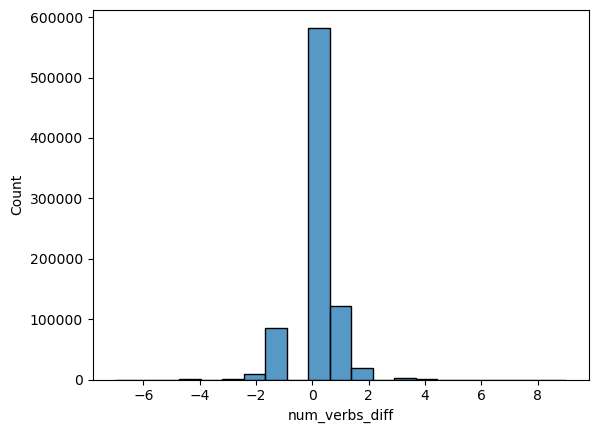

In [173]:
# visualise the histogram for num_verbs_diff
sns.histplot(data=df_cor_eda,x='num_verbs_diff')

<Axes: xlabel='num_nouns_diff', ylabel='Count'>

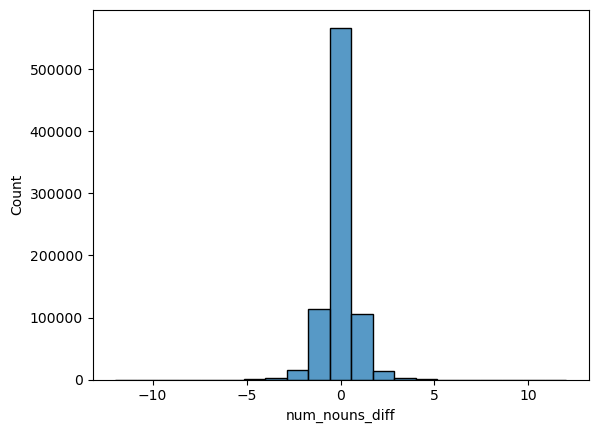

In [174]:
# visualise the histogram for num_nouns_diff
sns.histplot(data=df_cor_eda,x='num_nouns_diff')

<Axes: xlabel='num_adjs_diff', ylabel='Count'>

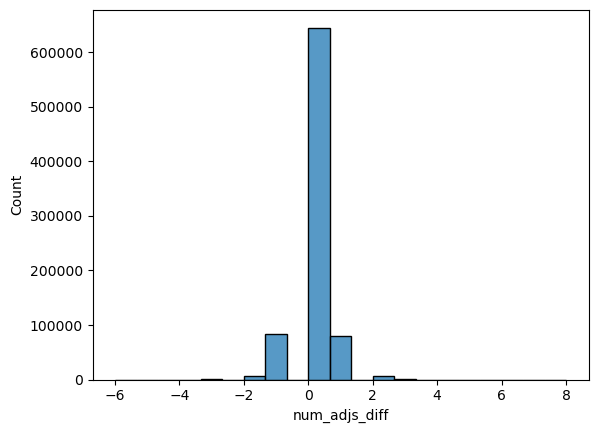

In [175]:
# visualise the histogram for num_adjs_diff
sns.histplot(data=df_cor_eda,x='num_adjs_diff')

<Axes: xlabel='num_adv_diff', ylabel='Count'>

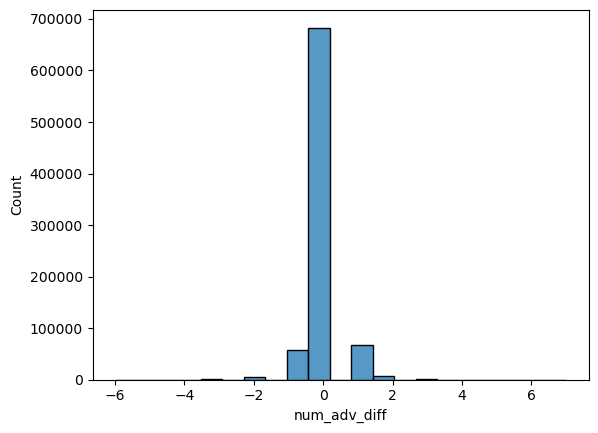

In [176]:
# visualise the histogram for num_adv_diff
sns.histplot(data=df_cor_eda,x='num_adv_diff')

<Axes: xlabel='num_pronoun_diff', ylabel='Count'>

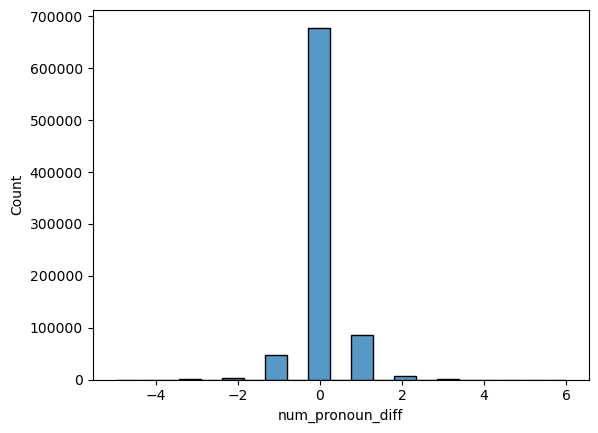

In [177]:
# visualise the histogram for num_pronoun_diff
sns.histplot(data=df_cor_eda,x='num_pronoun_diff')

<Axes: xlabel='num_conjunction_diff', ylabel='Count'>

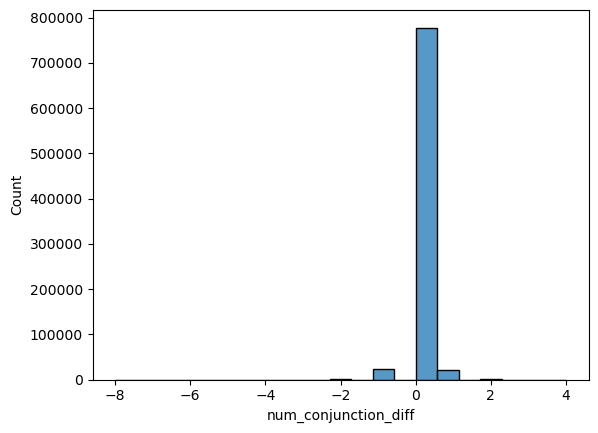

In [178]:
# visualise the histogram for num_conjunction_diff
sns.histplot(data=df_cor_eda,x='num_conjunction_diff')

<Axes: xlabel='num_article_diff', ylabel='Count'>

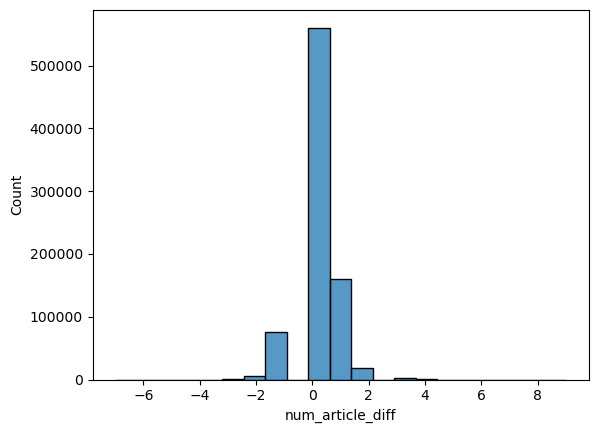

In [179]:
# visualise the histogram for num_article_diff
sns.histplot(data=df_cor_eda,x='num_article_diff')

<Axes: xlabel='num_modal_diff', ylabel='Count'>

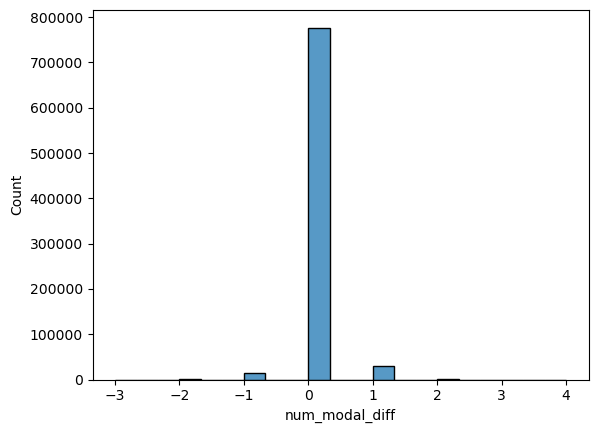

In [180]:
# visualise the histogram for num_modal_diff
sns.histplot(data=df_cor_eda,x='num_modal_diff')

In [181]:
# save csv file
file_path=os.path.join(parent_folder, '2. Raw Data/Japanese_to_English_pos.csv')
df_cor_eda.to_csv(file_path)